In [1]:
import os

import pandas as pd

In [2]:
data_path = os.path.join('..', 'data', 'raw')

In [3]:
df_taxi_owners = pd.read_pickle(os.path.join(data_path, 'taxi_owners.p'))
df_taxi_vehicles = pd.read_pickle(os.path.join(data_path, 'taxi_vehicles.p'))

In [4]:
df_taxi_owners.head()

,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618


In [5]:
df_taxi_vehicles.columns

Index(['vid', 'make', 'model', 'year', 'fuel_type', 'owner'], dtype='object')

In [6]:
df_taxi_owners.columns

Index(['rid', 'vid', 'owner', 'address', 'zip'], dtype='object')

In [7]:
df_taxi_own_veh = df_taxi_owners.merge(df_taxi_vehicles, on='vid')

In [8]:
df_taxi_own_veh.head()

,rid,vid,owner_x,address,zip,make,model,year,fuel_type,owner_y
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.


In [9]:
print(df_taxi_own_veh.shape, df_taxi_owners.shape, df_taxi_vehicles.shape)

(3519, 10) (3519, 5) (3519, 6)


In [11]:
df_taxi_owners.merge(df_taxi_vehicles, on='vid', suffixes=('_owners', '_vehicles')).head()

,rid,vid,owner_owners,address,zip,make,model,year,fuel_type,owner_vehicles
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.


### Indicator

In [12]:
df_taxi_owners.merge(df_taxi_vehicles, on='vid', indicator=True).head()

,rid,vid,owner_x,address,zip,make,model,year,fuel_type,owner_y,_merge
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC,both
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.,both
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC.",both
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.,both
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.,both


In [13]:
df_taxi_owners.merge(df_taxi_vehicles, on='vid', indicator=True)['_merge'].value_counts()

_merge
both          3519
left_only        0
right_only       0
Name: count, dtype: int64

### Validate

In [14]:
df_taxi_owners.merge(df_taxi_vehicles, on='vid', validate='one_to_many').head()

,rid,vid,owner_x,address,zip,make,model,year,fuel_type,owner_y
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.


In [18]:
df_taxi_owners_sample = df_taxi_owners.sample(frac=.8)
df_taxi_owners_duplicated = pd.concat([df_taxi_owners, df_taxi_owners_sample], ignore_index=True)

In [20]:
df_taxi_owners_sample.merge(df_taxi_vehicles, on='vid', validate='many_to_one').head()

,rid,vid,owner_x,address,zip,make,model,year,fuel_type,owner_y
0,T5967,5967,RITEWAY CAB CO,4020 W. GLENLAKE AVE.,60646,TOYOTA,PRIUS,2012,HYBRID,RITEWAY CAB CO
1,T6214,6214,"CHICAGO POLO XVII, INC",2617 S. WABASH AVE.,60616,FORD,ESCAPE,2012,HYBRID,"CHICAGO POLO XVII, INC"
2,T1747,1747,SENEGAL TRANSIT INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2020,HYBRID,SENEGAL TRANSIT INC.
3,T4101,4101,GREENWICH CAB CORP.,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,GREENWICH CAB CORP.
4,T1251,1251,JO JO CAB CO,6329 N. KOLMAR AVE.,60646,TOYOTA,CAMRY,2014,HYBRID,JO JO CAB CO


### ignore_index

In [21]:
df_5 = df_taxi_owners.head(5)
df_15 = df_taxi_owners.iloc[15:21]

In [22]:
df_5

,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618


In [23]:
df_15

,rid,vid,owner,address,zip
15,T5494,5494,NBA TAXI INC.,4020 W. GLENLAKE AVE.,60646
16,T227,227,BABY CAB CORP.,2617 S. WABASH AVE.,60616
17,T1609,1609,MG & KA INC,3351 W. ADDISON ST.,60618
18,T1447,1447,SNOWSTORM II HACKING CORP.,2617 S. WABASH AVE.,60616
19,T468,468,M ASANTE INC.,3351 W. ADDISON ST.,60618
20,T799,799,ALAM ENT INC.,5501 N. MELVINA AVE.,60630


In [26]:
pd.concat([df_5, df_15], ignore_index=False).reset_index(drop=False)

,index,rid,vid,owner,address,zip
0,0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618
5,15,T5494,5494,NBA TAXI INC.,4020 W. GLENLAKE AVE.,60646
6,16,T227,227,BABY CAB CORP.,2617 S. WABASH AVE.,60616
7,17,T1609,1609,MG & KA INC,3351 W. ADDISON ST.,60618
8,18,T1447,1447,SNOWSTORM II HACKING CORP.,2617 S. WABASH AVE.,60616
9,19,T468,468,M ASANTE INC.,3351 W. ADDISON ST.,60618


### left_on, right_on

In [27]:
df_taxi_vehicles_renamed = df_taxi_vehicles.rename(mapper={
    'vid': 'vid_pro',

},
    axis=1

)



In [28]:
df_taxi_vehicles_renamed.columns

Index(['vid_pro', 'make', 'model', 'year', 'fuel_type', 'owner'], dtype='object')

In [30]:
df_taxi_owners_duplicated.merge(df_taxi_vehicles_renamed, left_on='vid', right_on='vid_pro')

,rid,vid,owner_x,address,zip,vid_pro,make,model,year,fuel_type,owner_y
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,6285,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,4862,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,1495,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,4231,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,5971,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.
...,...,...,...,...,...,...,...,...,...,...,...
6329,T4577,4577,SIENNA ZONE CAB CO.,2617 S. WABASH AVE.,60616,4577,FORD,ESCAPE,2012,HYBRID,SIENNA ZONE CAB CO.
6330,T5976,5976,BELICAGO TAXI LLC,3351 W. ADDISON ST.,60618,5976,TOYOTA,PRIUS,2015,HYBRID,BELICAGO TAXI LLC
6331,T6394,6394,BIG APPLE CAB ONE CO.,3351 W. ADDISON ST.,60618,6394,TOYOTA,PRIUS,2014,HYBRID,BIG APPLE CAB ONE CO.
6332,T1010,1010,ADA TEUTA GENTI CORP,5941 N. KIMBALL AVE.,60659,1010,TOYOTA,CAMRY,2018,HYBRID,ADA TEUTA GENTI CORP


### how

In [47]:
df_taxi_owners_mod = df_taxi_owners.copy()

In [33]:
df_taxi_owners_mod['vid'] = df_taxi_owners_mod['vid'].sample(frac=.3)

In [35]:
df_taxi_owners_mod['vid'].isna().sum()

np.int64(2463)

In [40]:
def cals_new_vid(row):
    print(row)
    return row

In [42]:
df_taxi_owners_mod.iloc[:5].apply(cals_new_vid, axis=1)

rid                      T6285
vid                       6285
owner           AGEAN TAXI LLC
address    4536 N. ELSTON AVE.
zip                      60630
Name: 0, dtype: object
rid                         T4862
vid                          4862
owner                MANGIB CORP.
address    5717 N. WASHTENAW AVE.
zip                         60659
Name: 1, dtype: object
rid                      T1495
vid                       1495
owner            FUNRIDE, INC.
address    3351 W. ADDISON ST.
zip                      60618
Name: 2, dtype: object
rid                        T4231
vid                         4231
owner               ALQUSH CORP.
address    6611 N. CAMPBELL AVE.
zip                        60645
Name: 3, dtype: object
rid                      T5971
vid                       5971
owner           EUNIFFORD INC.
address    3351 W. ADDISON ST.
zip                      60618
Name: 4, dtype: object


,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618


In [48]:

from random import randint

df_taxi_owners_mod['vid'] = df_taxi_owners_mod.apply(lambda row: row['vid']  + str(randint(0, 10)) if randint(0, 1) else row['vid'], axis=1)

In [44]:
df_taxi_owners_mod['vid'].isna().sum()

np.int64(0)

In [31]:
# inner - vid w obu df musi miec dopasowanie

df_taxi_owners_duplicated.merge(df_taxi_vehicles, on='vid').shape

(6334, 10)

In [49]:
df_taxi_owners_mod.merge(df_taxi_vehicles, on='vid').shape

(1780, 10)

In [50]:
# left - wszystkie lewe + dopasowane
df_taxi_owners_mod.merge(df_taxi_vehicles, on='vid', how='left').shape

(3519, 10)

In [51]:
df_taxi_owners_mod.merge(df_taxi_vehicles, on='vid', how='left')['fuel_type'].isna().sum()

np.int64(1739)

In [52]:
# right = wszystkie prawe
# left - wszystkie lewe + dopasowane
df_taxi_owners_mod.merge(df_taxi_vehicles, on='vid', how='right').shape

(3550, 10)

In [53]:
# outer = wszytskie lewe i wytskie prawe
df_taxi_owners_mod.merge(df_taxi_vehicles, on='vid', how='outer').shape

(5289, 10)

In [54]:
df_crews = pd.read_pickle(os.path.join(data_path, 'crews.p'))

In [55]:
df_crews.columns

Index(['id', 'department', 'job', 'name'], dtype='object')

In [56]:
df_crews.head()

,id,department,job,name
0,19995,Editing,Editor,Stephen E. Rivkin
2,19995,Sound,Sound Designer,Christopher Boyes
4,19995,Production,Casting,Mali Finn
6,19995,Directing,Director,James Cameron
7,19995,Writing,Writer,James Cameron


In [57]:
df_crews_self = df_crews.merge(df_crews, on='id', how='inner', suffixes=('_dir', '_crew'))

In [58]:
df_crews_self

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
0,19995,Editing,Editor,Stephen E. Rivkin,Editing,Editor,Stephen E. Rivkin
1,19995,Editing,Editor,Stephen E. Rivkin,Sound,Sound Designer,Christopher Boyes
2,19995,Editing,Editor,Stephen E. Rivkin,Production,Casting,Mali Finn
3,19995,Editing,Editor,Stephen E. Rivkin,Directing,Director,James Cameron
4,19995,Editing,Editor,Stephen E. Rivkin,Writing,Writer,James Cameron
...,...,...,...,...,...,...,...
834189,25975,Directing,Director,Jon Gunn,Directing,Director,Brett Winn
834190,25975,Directing,Director,Brett Winn,Production,Executive Producer,Clark Peterson
834191,25975,Directing,Director,Brett Winn,Directing,Director,Brian Herzlinger
834192,25975,Directing,Director,Brett Winn,Directing,Director,Jon Gunn


In [59]:
df_crews.shape

(42502, 4)

In [60]:
df_crews['id'].unique()

array([ 19995,    285, 206647, ..., 231617, 126186,  25975], shape=(4775,))

In [61]:
df_crews_self[((df_crews_self['job_dir'] == 'Director') & (df_crews_self['job_crew'] != 'Director'))]

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
156,19995,Directing,Director,James Cameron,Editing,Editor,Stephen E. Rivkin
157,19995,Directing,Director,James Cameron,Sound,Sound Designer,Christopher Boyes
158,19995,Directing,Director,James Cameron,Production,Casting,Mali Finn
160,19995,Directing,Director,James Cameron,Writing,Writer,James Cameron
161,19995,Directing,Director,James Cameron,Art,Set Designer,Richard F. Mays
...,...,...,...,...,...,...,...
834166,72766,Directing,Director,Edward Burns,Editing,Editor,Janet Gaynor
834174,231617,Directing,Director,Scott Smith,Production,Executive Producer,Scott Smith
834182,25975,Directing,Director,Brian Herzlinger,Production,Executive Producer,Clark Peterson
834186,25975,Directing,Director,Jon Gunn,Production,Executive Producer,Clark Peterson


In [63]:
df_gdp = pd.read_csv(os.path.join(data_path, 'WorldBank_GDP.csv'))
df_pop = pd.read_csv(os.path.join(data_path, 'WorldBank_POP.csv'))


### Concat_

In [64]:
df_gdp.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Year', 'GDP'], dtype='object')

In [65]:
df_pop.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Year', 'Pop'], dtype='object')

In [66]:
df_gdp['Country Code'].value_counts()

Country Code
CHN    10
DEU    10
JPN    10
USA    10
Name: count, dtype: int64

In [68]:
pd.concat([df_pop, df_gdp], axis=1)

,Country Name,Country Code,Indicator Name,Year,Pop,Country Name,Country Code,Indicator Name,Year,GDP
0,Aruba,ABW,"Population, total",2010,101669.0,China,CHN,GDP (current US$),2010.0,6.087160e+12
1,Afghanistan,AFG,"Population, total",2010,29185507.0,Germany,DEU,GDP (current US$),2010.0,3.417090e+12
2,Angola,AGO,"Population, total",2010,23356246.0,Japan,JPN,GDP (current US$),2010.0,5.700100e+12
3,Albania,ALB,"Population, total",2010,2913021.0,United States,USA,GDP (current US$),2010.0,1.499210e+13
4,Andorra,AND,"Population, total",2010,84449.0,China,CHN,GDP (current US$),2011.0,7.551500e+12
...,...,...,...,...,...,...,...,...,...,...
2635,Kosovo,XKX,"Population, total",2018,1845300.0,NaN,NaN,NaN,NaN,NaN
2636,"Yemen, Rep.",YEM,"Population, total",2018,28498687.0,NaN,NaN,NaN,NaN,NaN
2637,South Africa,ZAF,"Population, total",2018,57779622.0,NaN,NaN,NaN,NaN,NaN
2638,Zambia,ZMB,"Population, total",2018,17351822.0,NaN,NaN,NaN,NaN,NaN


In [69]:
pd.concat([df_pop, df_gdp], axis=0)

,Country Name,Country Code,Indicator Name,Year,Pop,GDP
0,Aruba,ABW,"Population, total",2010,101669.0,NaN
1,Afghanistan,AFG,"Population, total",2010,29185507.0,NaN
2,Angola,AGO,"Population, total",2010,23356246.0,NaN
3,Albania,ALB,"Population, total",2010,2913021.0,NaN
4,Andorra,AND,"Population, total",2010,84449.0,NaN
...,...,...,...,...,...,...
35,United States,USA,GDP (current US$),2017,NaN,1.948540e+13
36,China,CHN,GDP (current US$),2018,NaN,1.360820e+13
37,Germany,DEU,GDP (current US$),2018,NaN,3.996760e+12
38,Japan,JPN,GDP (current US$),2018,NaN,4.970920e+12


In [70]:
df_sp500 = pd.read_csv(os.path.join(data_path, 'S&P500.csv'))

In [71]:
df_sp500.columns

Index(['Date', 'Returns'], dtype='object')

In [72]:
df_sp500.head()

,Date,Returns
0,2008,-38.49
1,2009,23.45
2,2010,12.78
3,2011,0.00
4,2012,13.41


In [74]:
pd.merge(df_gdp, df_sp500, left_on='Year', right_on="Date", how='left')

,Country Name,Country Code,Indicator Name,Year,GDP,Date,Returns
0,China,CHN,GDP (current US$),2010,6.087160e+12,2010.0,12.78
1,Germany,DEU,GDP (current US$),2010,3.417090e+12,2010.0,12.78
2,Japan,JPN,GDP (current US$),2010,5.700100e+12,2010.0,12.78
3,United States,USA,GDP (current US$),2010,1.499210e+13,2010.0,12.78
4,China,CHN,GDP (current US$),2011,7.551500e+12,2011.0,0.00
5,Germany,DEU,GDP (current US$),2011,3.757700e+12,2011.0,0.00
6,Japan,JPN,GDP (current US$),2011,6.157460e+12,2011.0,0.00
7,United States,USA,GDP (current US$),2011,1.554260e+13,2011.0,0.00
8,China,CHN,GDP (current US$),2012,8.532230e+12,2012.0,13.41
9,Germany,DEU,GDP (current US$),2012,3.543980e+12,2012.0,13.41


In [77]:
gdp_sp500 = pd.merge_ordered(df_gdp, df_sp500, left_on='Year', right_on="Date", how='left', fill_method='ffill')

In [78]:
gdp_returns = gdp_sp500[['GDP', 'Returns']]

In [79]:
gdp_returns.corr()

,GDP,Returns
GDP,1.000000,0.040669
Returns,0.040669,1.000000


### merge_asof

In [80]:
from io import StringIO

In [92]:
jpm_io =StringIO("""            date_time   close
0  2017-11-17 15:35:17  98.120
1  2017-11-17 15:40:04  98.180
2  2017-11-17 15:45:01  97.731
3  2017-11-17 15:50:55  97.740
4  2017-11-17 15:55:00  97.815
5  2017-11-17 16:00:30  98.020
6  2017-11-17 16:05:07  97.800
7  2017-11-17 16:10:08  97.840
8  2017-11-17 16:15:11  97.710
9  2017-11-17 16:20:29  97.760
10 2017-11-17 16:25:25  97.820
11 2017-11-17 16:30:53  97.950
12 2017-11-17 16:35:11  97.990
13 2017-11-17 16:40:44  98.060
14 2017-11-17 16:45:52  98.050
15 2017-11-17 16:50:37  98.110
16 2017-11-17 16:55:02  98.180
""".strip())

In [93]:
wells_io = StringIO("""             date_time   close
0  2017-11-17 15:35:08  54.323
1  2017-11-17 15:40:00  54.320
2  2017-11-17 15:45:32  54.190
3  2017-11-17 15:50:07  54.170
4  2017-11-17 15:55:00  54.184
5  2017-11-17 16:00:30  54.265
6  2017-11-17 16:05:52  54.200
7  2017-11-17 16:10:22  54.155
8  2017-11-17 16:15:43  54.190
9  2017-11-17 16:20:07  54.205
10 2017-11-17 16:25:13  54.230
11 2017-11-17 16:30:04  54.220
12 2017-11-17 16:35:32  54.220
13 2017-11-17 16:40:09  54.280
14 2017-11-17 16:45:24  54.240
15 2017-11-17 16:50:28  54.170
16 2017-11-17 16:55:42  54.180
""".strip())

In [94]:
jpm = pd.read_csv(jpm_io, skiprows=1,names=['date','time', 'close'], sep=r"\s+")

In [95]:
jpm['date_time'] = pd.to_datetime(jpm['date'] + " " + jpm['time'])

In [96]:
jpm.drop(columns=['date', 'time'], inplace=True)

In [98]:
jpm = jpm[['date_time', 'close']]

In [99]:
jpm

,date_time,close
0,2017-11-17 15:35:17,98.120
1,2017-11-17 15:40:04,98.180
2,2017-11-17 15:45:01,97.731
3,2017-11-17 15:50:55,97.740
4,2017-11-17 15:55:00,97.815
5,2017-11-17 16:00:30,98.020
6,2017-11-17 16:05:07,97.800
7,2017-11-17 16:10:08,97.840
8,2017-11-17 16:15:11,97.710
9,2017-11-17 16:20:29,97.760


In [100]:
jpm.head()

,date_time,close
0,2017-11-17 15:35:17,98.120
1,2017-11-17 15:40:04,98.180
2,2017-11-17 15:45:01,97.731
3,2017-11-17 15:50:55,97.740
4,2017-11-17 15:55:00,97.815


In [101]:
wells_io = StringIO("""
             date_time   close
0  2017-11-17 15:35:08  54.323
1  2017-11-17 15:40:00  54.320
2  2017-11-17 15:45:32  54.190
3  2017-11-17 15:50:07  54.170
4  2017-11-17 15:55:00  54.184
5  2017-11-17 16:00:30  54.265
6  2017-11-17 16:05:52  54.200
7  2017-11-17 16:10:22  54.155
8  2017-11-17 16:15:43  54.190
9  2017-11-17 16:20:07  54.205
10 2017-11-17 16:25:13  54.230
11 2017-11-17 16:30:04  54.220
12 2017-11-17 16:35:32  54.220
13 2017-11-17 16:40:09  54.280
14 2017-11-17 16:45:24  54.240
15 2017-11-17 16:50:28  54.170
16 2017-11-17 16:55:42  54.180
""".strip())

wells = pd.read_csv(wells_io, skiprows=1, names=["date", "time", "close"], sep=r'\s+')
wells["date_time"] = pd.to_datetime(wells["date"] + " " + wells["time"])
wells.drop(columns=["date", "time"], inplace=True)
wells = wells[["date_time", "close"]]

In [106]:
jpm_wells_bac = pd.merge_asof(jpm, wells_io, on="date_time", suffixes=("_jpm", "_bac"), direction="nearest")

TypeError: Can only merge Series or DataFrame objects, a <class '_io.StringIO'> was passed

In [102]:
bac = StringIO("""            date_time   close
0  2017-11-17 15:35:17  26.552
1  2017-11-17 15:40:06  26.552
2  2017-11-17 15:45:05  26.388
3  2017-11-17 15:50:34  26.378
4  2017-11-17 15:55:06  26.383
5  2017-11-17 16:00:18  26.452
6  2017-11-17 16:05:20  26.373
7  2017-11-17 16:10:05  26.388
8  2017-11-17 16:15:07  26.369
9  2017-11-17 16:20:29  26.388
10 2017-11-17 16:25:00  26.467
11 2017-11-17 16:30:18  26.482
12 2017-11-17 16:35:08  26.492
13 2017-11-17 16:40:46  26.527
14 2017-11-17 16:45:55  26.522
15 2017-11-17 16:50:05  26.547
16 2017-11-17 16:55:02  26.567
""".strip())

In [ ]:
price_diff = jpm_wells_bac.diff()

In [104]:
import matplotlib.pyplot as plt

In [103]:
price_diff.plot(y=['close_jpm', 'close_wells', 'close_bac'])
plt.show

NameError: name 'price_diff' is not defined

In [ ]:
fig, ax = plt.subplots(figsize=(10, 0))

price_diff.plot(y=["close_jpm", "close_wells", "close_bac"], ax=ax)
plt.show()

## long format, wide format

In [107]:
df = pd.DataFrame({
    'ID': [1, 2, 3],
    'A': [10, 20, 30],
    'B': [100, 200, 300]
})

In [108]:
df

,ID,A,B
0,1,10,100
1,2,20,200
2,3,30,300


In [110]:
df.melt(id_vars=['ID'], var_name='Category', value_name='Value')

,ID,Category,Value
0,1,A,10
1,2,A,20
2,3,A,30
3,1,B,100
4,2,B,200
5,3,B,300


In [117]:
buffer = StringIO("""    year  jan  feb  mar  apr  ...  aug  sep  oct  nov  dec
0   2010  9.8  9.8  9.9  9.9  ...  9.5  9.5  9.4  9.8  9.3
1   2011  9.1  9.0  9.0  9.1  ...  9.0  9.0  8.8  8.6  8.5
2   2012  8.3  8.3  8.2  8.2  ...  8.1  7.8  7.8  7.7  7.9
3   2013  8.0  7.7  7.5  7.6  ...  7.2  7.2  7.2  6.9  6.7
4   2014  6.6  6.7  6.7  6.2  ...  6.1  5.9  5.7  5.8  5.6
5   2015  5.7  5.5  5.4  5.4  ...  5.1  5.0  5.0  5.1  5.0
6   2016  4.9  4.9  5.0  5.0  ...  4.9  5.0  4.9  4.7  4.7
7   2017  4.7  4.6  4.4  4.4  ...  4.4  4.2  4.1  4.2  4.1
8   2018  4.1  4.1  4.0  4.0  ...  3.8  3.7  3.8  3.7  3.9
9   2019  4.0  3.8  3.8  3.6  ...  3.7  3.5  3.6  3.5  3.5
10  2020  3.6  3.5  4.4  NaN  ...  NaN  NaN  NaN  NaN  NaN
""".strip())

In [118]:
df = pd.read_csv(buffer, sep=r'\s+').drop(columns=['...'])
df

,year,jan,feb,mar,apr,aug,sep,oct,nov,dec
0,2010,9.8,9.8,9.9,9.9,9.5,9.5,9.4,9.8,9.3
1,2011,9.1,9.0,9.0,9.1,9.0,9.0,8.8,8.6,8.5
2,2012,8.3,8.3,8.2,8.2,8.1,7.8,7.8,7.7,7.9
3,2013,8.0,7.7,7.5,7.6,7.2,7.2,7.2,6.9,6.7
4,2014,6.6,6.7,6.7,6.2,6.1,5.9,5.7,5.8,5.6
5,2015,5.7,5.5,5.4,5.4,5.1,5.0,5.0,5.1,5.0
6,2016,4.9,4.9,5.0,5.0,4.9,5.0,4.9,4.7,4.7
7,2017,4.7,4.6,4.4,4.4,4.4,4.2,4.1,4.2,4.1
8,2018,4.1,4.1,4.0,4.0,3.8,3.7,3.8,3.7,3.9
9,2019,4.0,3.8,3.8,3.6,3.7,3.5,3.6,3.5,3.5


In [119]:
df_tall = df.melt(id_vars=['year'], var_name='month', value_name='unempl_rate')

In [120]:
df_tall

,year,month,unempl_rate
0,2010,jan,9.8
1,2011,jan,9.1
2,2012,jan,8.3
3,2013,jan,8.0
4,2014,jan,6.6
...,...,...,...
94,2016,dec,4.7
95,2017,dec,4.1
96,2018,dec,3.9
97,2019,dec,3.5


In [125]:
df_tall['year'] = df_tall['year'].astype(str)

In [132]:
df_tall['date'] = pd.to_datetime(df_tall['year'] + '-' + df_tall['month'], format='%Y-%b')

In [133]:
df_tall

,year,month,unempl_rate,date
0,2010,jan,9.8,2010-01-01
1,2011,jan,9.1,2011-01-01
2,2012,jan,8.3,2012-01-01
3,2013,jan,8.0,2013-01-01
4,2014,jan,6.6,2014-01-01
...,...,...,...,...
94,2016,dec,4.7,2016-12-01
95,2017,dec,4.1,2017-12-01
96,2018,dec,3.9,2018-12-01
97,2019,dec,3.5,2019-12-01


In [134]:
df_sorted = df_tall.sort_values(by=['date'], ascending=[True])

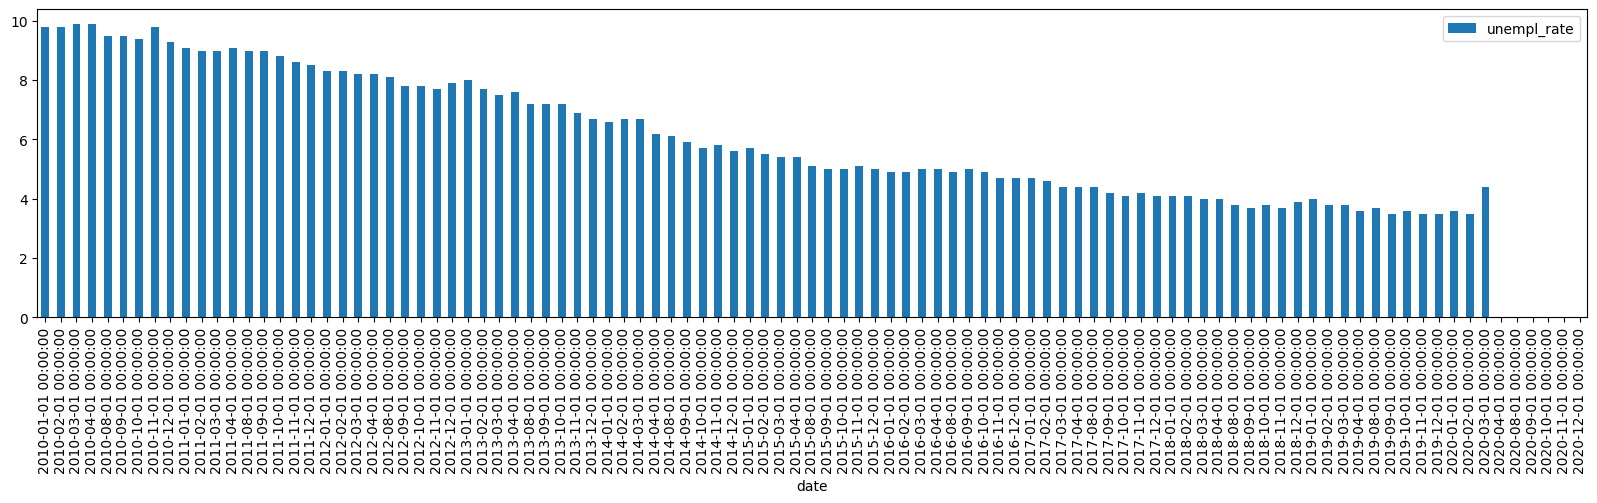

In [136]:
fig, ax = plt.subplots(figsize=(20, 4))

df_sorted.plot(x='date', y='unempl_rate', ax=ax, kind='bar')
plt.show()

In [137]:
df

,year,jan,feb,mar,apr,aug,sep,oct,nov,dec
0,2010,9.8,9.8,9.9,9.9,9.5,9.5,9.4,9.8,9.3
1,2011,9.1,9.0,9.0,9.1,9.0,9.0,8.8,8.6,8.5
2,2012,8.3,8.3,8.2,8.2,8.1,7.8,7.8,7.7,7.9
3,2013,8.0,7.7,7.5,7.6,7.2,7.2,7.2,6.9,6.7
4,2014,6.6,6.7,6.7,6.2,6.1,5.9,5.7,5.8,5.6
5,2015,5.7,5.5,5.4,5.4,5.1,5.0,5.0,5.1,5.0
6,2016,4.9,4.9,5.0,5.0,4.9,5.0,4.9,4.7,4.7
7,2017,4.7,4.6,4.4,4.4,4.4,4.2,4.1,4.2,4.1
8,2018,4.1,4.1,4.0,4.0,3.8,3.7,3.8,3.7,3.9
9,2019,4.0,3.8,3.8,3.6,3.7,3.5,3.6,3.5,3.5


In [138]:
pd.read_pickle(os.path.join(data_path, 'ratings.p'))

,id,vote_average,vote_count
0,19995,7.2,11800.0
1,285,6.9,4500.0
2,206647,6.3,4466.0
3,49026,7.6,9106.0
4,49529,6.1,2124.0
...,...,...,...
4798,9367,6.6,238.0
4799,72766,5.9,5.0
4800,231617,7.0,6.0
4801,126186,5.7,7.0


In [140]:
buffer = StringIO("""
  metric  2007-02-01  2007-03-01  2007-04-01  2007-05-01  ...  2009-08-01  2009-09-01  2009-10-01  2009-11-01  2009-12-01
0   open       0.033      -0.060       0.025      -0.004  ...      -0.007      -0.047      -0.032       0.034      -0.051
1   high      -0.007      -0.041       0.022       0.031  ...       0.032      -0.090       0.012      -0.004       0.099
2    low      -0.016      -0.008       0.031      -0.002  ...       0.040      -0.036      -0.051       0.030       0.007
3  close      -0.057       0.022      -0.004       0.056  ...      -0.029      -0.028       0.026      -0.056       0.201""".strip())

df = pd.read_csv(buffer, sep=r'\s+').drop(columns=['...'])
df

,metric,2007-02-01,2007-03-01,2007-04-01,2007-05-01,2009-08-01,2009-09-01,2009-10-01,2009-11-01,2009-12-01
0,open,0.033,-0.060,0.025,-0.004,-0.007,-0.047,-0.032,0.034,-0.051
1,high,-0.007,-0.041,0.022,0.031,0.032,-0.090,0.012,-0.004,0.099
2,low,-0.016,-0.008,0.031,-0.002,0.040,-0.036,-0.051,0.030,0.007
3,close,-0.057,0.022,-0.004,0.056,-0.029,-0.028,0.026,-0.056,0.201


In [141]:
bond_perc = df.melt(id_vars='metric', var_name='date', value_name='close')
bond_perc

,metric,date,close
0,open,2007-02-01,0.033
1,high,2007-02-01,-0.007
2,low,2007-02-01,-0.016
3,close,2007-02-01,-0.057
4,open,2007-03-01,-0.060
5,high,2007-03-01,-0.041
6,low,2007-03-01,-0.008
7,close,2007-03-01,0.022
8,open,2007-04-01,0.025
9,high,2007-04-01,0.022


In [144]:
bond_perc_close = bond_perc.query("metric=='close'")
bond_perc_close

,metric,date,close
3,close,2007-02-01,-0.057
7,close,2007-03-01,0.022
11,close,2007-04-01,-0.004
15,close,2007-05-01,0.056
19,close,2009-08-01,-0.029
23,close,2009-09-01,-0.028
27,close,2009-10-01,0.026
31,close,2009-11-01,-0.056
35,close,2009-12-01,0.201


In [145]:
df = pd.read_csv(os.path.join(data_path, 'players_20.csv'))
df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In [146]:
df.shape

(18278, 104)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [149]:
df.dtypes

sofifa_id      int64
player_url    object
short_name    object
long_name     object
age            int64
               ...  
lb            object
lcb           object
cb            object
rcb           object
rb            object
Length: 104, dtype: object

In [151]:
list(df.columns)

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

In [153]:
cols_names = ['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club']

In [156]:
df = df[cols_names].copy()

In [155]:
df

,short_name,age,height_cm,weight_kg,nationality,club
0,L. Messi,32,170,72,Argentina,FC Barcelona
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid
4,E. Hazard,28,175,74,Belgium,Real Madrid
...,...,...,...,...,...,...
18273,Shao Shuai,22,186,79,China PR,Beijing Renhe FC
18274,Xiao Mingjie,22,177,66,China PR,Shanghai SIPG FC
18275,Zhang Wei,19,186,75,China PR,Hebei China Fortune FC
18276,Wang Haijian,18,185,74,China PR,Shanghai Greenland Shenhua FC


In [157]:
df.rename(columns={
    'short_name': "name",
    'height_cm': "height",
    'weight_kg': "weight",
},
    inplace=True
)


In [158]:
df

,name,age,height,weight,nationality,club
0,L. Messi,32,170,72,Argentina,FC Barcelona
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid
4,E. Hazard,28,175,74,Belgium,Real Madrid
...,...,...,...,...,...,...
18273,Shao Shuai,22,186,79,China PR,Beijing Renhe FC
18274,Xiao Mingjie,22,177,66,China PR,Shanghai SIPG FC
18275,Zhang Wei,19,186,75,China PR,Hebei China Fortune FC
18276,Wang Haijian,18,185,74,China PR,Shanghai Greenland Shenhua FC


In [159]:
df = df.set_index('name')
df

,age,height,weight,nationality,club
name,,,,,
L. Messi,32,170,72,Argentina,FC Barcelona
Cristiano Ronaldo,34,187,83,Portugal,Juventus
Neymar Jr,27,175,68,Brazil,Paris Saint-Germain
J. Oblak,26,188,87,Slovenia,Atlético Madrid
E. Hazard,28,175,74,Belgium,Real Madrid
...,...,...,...,...,...
Shao Shuai,22,186,79,China PR,Beijing Renhe FC
Xiao Mingjie,22,177,66,China PR,Shanghai SIPG FC
Zhang Wei,19,186,75,China PR,Hebei China Fortune FC


In [160]:
df[['height', 'weight']]

,height,weight
name,,
L. Messi,170,72
Cristiano Ronaldo,187,83
Neymar Jr,175,68
J. Oblak,188,87
E. Hazard,175,74
...,...,...
Shao Shuai,186,79
Xiao Mingjie,177,66
Zhang Wei,186,75


In [161]:
df.loc['Cristiano Ronaldo']

age                  34
height              187
weight               83
nationality    Portugal
club           Juventus
Name: Cristiano Ronaldo, dtype: object

In [167]:
df = pd.read_csv(os.path.join(data_path, 'players_20.csv'), nrows=10)
df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,27,1991-07-08,193,92,Netherlands,Liverpool,...,79+3,83+3,83+3,83+3,79+3,81+3,87+3,87+3,87+3,81+3
8,177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,...,81+3,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3
9,209331,https://sofifa.com/player/209331/mohamed-salah...,M. Salah,Mohamed Salah Ghaly,27,1992-06-15,175,71,Egypt,Liverpool,...,70+3,67+3,67+3,67+3,70+3,66+3,57+3,57+3,57+3,66+3


In [168]:
cols = [name for name in  list(df.columns) if 'movement' in name]

In [170]:
df = df[cols + ['short_name']].copy()

In [171]:
df.rename(columns={'short_name': 'name'}, inplace=True)

In [172]:
pd.wide_to_long(df, stubnames=['movement'], i='name', j='overall', sep='_', suffix=r'\w+')

,,movement
name,overall,
L. Messi,acceleration,91
Cristiano Ronaldo,acceleration,89
Neymar Jr,acceleration,94
J. Oblak,acceleration,43
E. Hazard,acceleration,94
K. De Bruyne,acceleration,77
M. ter Stegen,acceleration,38
V. van Dijk,acceleration,74
L. Modrić,acceleration,77


In [174]:
df.reset_index[True]

TypeError: 'method' object is not subscriptable

In [ ]:
df.pivot(df, index='name, columns=' )

In [175]:
pd.pivot_table(df, index='name', columns='movement', values='overall')

KeyError: 'overall'